In [1]:
"""
The script demonstrates a simple example of using ART with PyTorch. The example train a small model on the MNIST dataset
and creates adversarial examples using the Fast Gradient Sign Method. Here we use the ART classifier to train the model,
it would also be possible to provide a pretrained model to the ART classifier.
The parameters are chosen for reduced computational requirements of the script and not optimised for accuracy.
"""
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

from art.attacks.evasion import FeatureAdversariesPyTorch
from art.estimators.classification import PyTorchClassifier
from art.utils import load_mnist


# Step 1: Load the MNIST dataset

(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()

# Step 1a: Swap axes to PyTorch's NCHW format

x_train = np.transpose(x_train, (0, 3, 1, 2)).astype(np.float32)
x_test = np.transpose(x_test, (0, 3, 1, 2)).astype(np.float32)

# Step 2: Create the model

model = nn.Sequential(
    nn.Conv2d(1, 4, 5), nn.ReLU(), nn.MaxPool2d(2, 2), 
    nn.Conv2d(4, 10, 5), nn.ReLU(), nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(4*4*10, 100),    
    nn.Linear(100, 10)
)
# Step 2a: Define the loss function and the optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 3: Create the ART classifier

classifier = PyTorchClassifier(
    model=model,
    clip_values=(min_pixel_value, max_pixel_value),
    loss=criterion,
    optimizer=optimizer,
    input_shape=(1, 28, 28),
    nb_classes=10,
)

# Step 4: Train the ART classifier

classifier.fit(x_train, y_train, batch_size=64, nb_epochs=3)

# Step 5: Evaluate the ART classifier on benign test examples

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

# Step 6: Generate adversarial test examples
attack = FeatureAdversariesPyTorch(classifier, layer=3, delta=10/255)

valid = np.argmax(y_test, axis=1)[:100] != np.argmax(y_test, axis=1)[100:200]
source = x_test[:100][valid][:32]
guide = x_test[100:200][valid][:32]

#x_test_adv = attack._generate_batch(torch.tensor(source), torch.tensor(guide))
#x_test_adv = x_test_adv.detach().cpu().numpy()
x_test_adv = attack.generate(source, guide)

# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test[:100][valid][:32], axis=1)) / len(y_test[:100][valid][:32])
print("Accuracy on adversarial test batch: {}%".format(accuracy * 100))


Accuracy on benign test examples: 96.34%


Adversarial Patch TensorFlow v2:   0%|          | 0/100 [00:00<?, ?it/s]

Iter 0, loss 108.28544616699219, constraint 1.422126054763794
Iter 1, loss 47.020118713378906, constraint 1.4467110633850098
Iter 2, loss 34.12235641479492, constraint 1.4004626274108887
Iter 3, loss 27.524707794189453, constraint 1.338158130645752
Iter 4, loss 25.178546905517578, constraint 1.3000271320343018
Iter 5, loss 23.598146438598633, constraint 1.2560021877288818
Iter 6, loss 22.714370727539062, constraint 1.2198078632354736
Iter 7, loss 21.2851619720459, constraint 1.2023142576217651
Iter 8, loss 20.908634185791016, constraint 1.172581434249878
Iter 9, loss 20.41781234741211, constraint 1.1559045314788818
Iter 10, loss 19.976520538330078, constraint 1.1344327926635742
Iter 11, loss 19.881742477416992, constraint 1.1144107580184937
Iter 12, loss 19.823238372802734, constraint 1.0966764688491821
Iter 13, loss 19.601564407348633, constraint 1.0800673961639404
Iter 14, loss 19.11903190612793, constraint 1.07847261428833
Iter 15, loss 18.79393768310547, constraint 1.06188213825225

In [2]:
import matplotlib.pyplot as plt

# orig labels
#np.argmax(y_test[range(0,11,2)], axis=1)

# guide labels
#np.argmax(y_test[range(100,111,2)], axis=1)

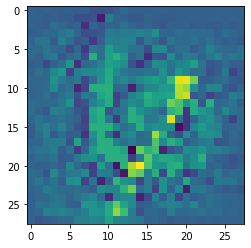

In [3]:
# orig 7, guide 6
plt.imshow(x_test_adv[0,...].squeeze())

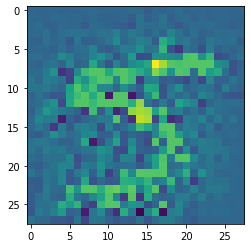

In [4]:
# orig 1, guide 5
plt.imshow(x_test_adv[2,...].squeeze())

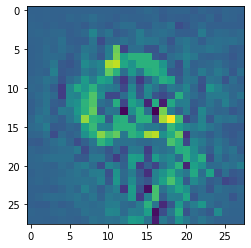

In [5]:
# orig 4, guide 9
plt.imshow(x_test_adv[4,...].squeeze())

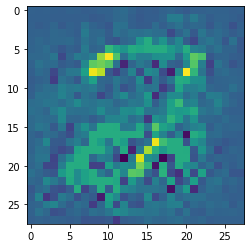

In [6]:
# orig 4, guide 2
plt.imshow(x_test_adv[6,...].squeeze())

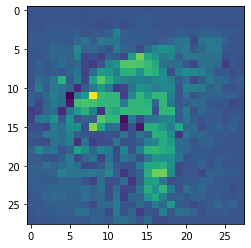

In [7]:
# orig 5, guide 9
plt.imshow(x_test_adv[8,...].squeeze())

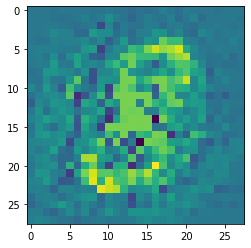

In [8]:
# orig 0, guide 8
plt.imshow(x_test_adv[10,...].squeeze())

In [9]:
"""
The script demonstrates a simple example of using ART with PyTorch. The example train a small model on the MNIST dataset
and creates adversarial examples using the Fast Gradient Sign Method. Here we use the ART classifier to train the model,
it would also be possible to provide a pretrained model to the ART classifier.
The parameters are chosen for reduced computational requirements of the script and not optimised for accuracy.
"""
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

from art.attacks.evasion import FeatureAdversaries
from art.estimators.classification import PyTorchClassifier
from art.utils import load_mnist


# Step 1: Load the MNIST dataset

(x_train, y_train), (x_test, y_test), min_pixel_value, max_pixel_value = load_mnist()

# Step 1a: Swap axes to PyTorch's NCHW format

x_train = np.transpose(x_train, (0, 3, 1, 2)).astype(np.float32)
x_test = np.transpose(x_test, (0, 3, 1, 2)).astype(np.float32)

# Step 2: Create the model

model = nn.Sequential(
    nn.Conv2d(1, 4, 5), nn.ReLU(), nn.MaxPool2d(2, 2), 
    nn.Conv2d(4, 10, 5), nn.ReLU(), nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(4*4*10, 100),    
    nn.Linear(100, 10)
)
# Step 2a: Define the loss function and the optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Step 3: Create the ART classifier

classifier = PyTorchClassifier(
    model=model,
    clip_values=(min_pixel_value, max_pixel_value),
    loss=criterion,
    optimizer=optimizer,
    input_shape=(1, 28, 28),
    nb_classes=10,
)

# Step 4: Train the ART classifier

classifier.fit(x_train, y_train, batch_size=64, nb_epochs=3)

# Step 5: Evaluate the ART classifier on benign test examples

predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

# Step 6: Generate adversarial test examples
attack = FeatureAdversaries(classifier, layer=3, delta=10/255)

valid = np.argmax(y_test, axis=1)[:100] != np.argmax(y_test, axis=1)[100:200]
source = x_test[:100][valid][:32]
guide = x_test[100:200][valid][:32]

# note: choose maxiter=2000 (default, 20) according to paper code
x_test_adv = attack.generate(source, guide, maxiter=2000).astype(np.float32)

# Step 7: Evaluate the ART classifier on adversarial test examples

predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test[:100][valid][:32], axis=1)) / len(y_test[:100][valid][:32])
print("Accuracy on adversarial test batch: {}%".format(accuracy * 100))


Accuracy on benign test examples: 96.55%
Accuracy on adversarial test batch: 100.0%


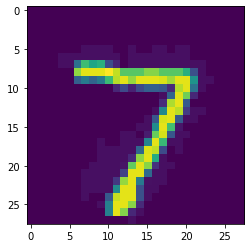

In [10]:
import matplotlib.pyplot as plt

# orig 7, guide 6
plt.imshow(x_test_adv[0,...].squeeze())

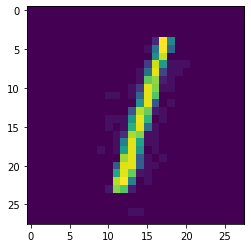

In [11]:
# orig 1, guide 5
plt.imshow(x_test_adv[2,...].squeeze())

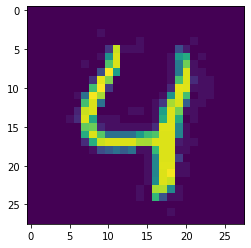

In [12]:
# orig 4, guide 9
plt.imshow(x_test_adv[4,...].squeeze())

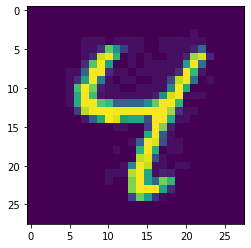

In [13]:
# orig 4, guide 2
plt.imshow(x_test_adv[6,...].squeeze())

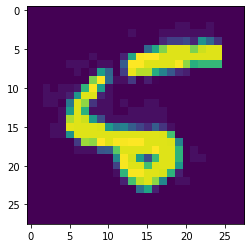

In [14]:
# orig 5, guide 9
plt.imshow(x_test_adv[8,...].squeeze())

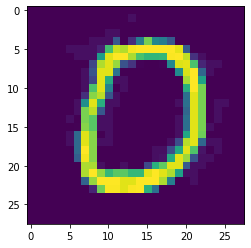

In [15]:
# orig 0, guide 8
plt.imshow(x_test_adv[10,...].squeeze())